# Local Binary Pattern (LBP) vs Histogram of Oriented Gradients (HOG)

In this image analysis project, I conducted a comparative study between Local Binary Pattern (LBP) and Histogram of Oriented Gradients (HOG) feature extraction techniques for a classification task. The project's outcomes revealed distinct performance patterns between the two methods. The LBP classifier exhibited comparable precision and recall rates, resulting in an overall accuracy of 55%. In contrast, the HOG classifier displayed notably higher precision (77%) and recall (58%), leading to an overall accuracy of 58%. The discrepancy in performance could potentially be attributed to factors other than the feature extraction methods. Notably, HOG features demonstrated greater resilience to noise and lighting variations, possibly due to their reliance on gradient orientations rather than pixel intensities. This observation underscores the importance of selecting feature extraction techniques that align with the specific characteristics of the data and the desired outcomes of the analysis.

### Importing Libraries

In [1]:
# Importing Libraries
from sklearn.metrics import classification_report
from skimage import feature
from skimage.feature import hog
from sklearn.svm import LinearSVC
from tqdm import tqdm
from sklearn.utils import shuffle
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Changing directory

In [2]:
# Changing directory
path1 = os.chdir('D:\\Python\\Datafolder\\archive\\real_vs_fake')

### Displaying an image from the directory

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


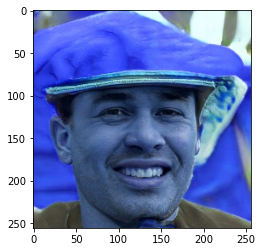

In [3]:
#Displaying an image from the directory
c = 0
while c<2:
    for i in os.listdir('test_fake'):
        img_path = cv2.imread(os.path.join('test_fake',i))
    print (plt.imshow(img_path))
    c += 1

### Training and Testing data

In [5]:
# Train data
X_train = []
y_train= []

# Test data
X_test = []
y_test = []

## Local Binary Pattern (LBP)

### Extracting LBP features from real train images

In [6]:
print ("Extracting Local Binary Pattern features from real train images")
Train_real = sorted(os.listdir("train_real"))
for file in tqdm(Train_real):
    file1 = cv2.imread(os.path.join('train_real',file))
    # Resizing the images
    cv2.resize(file1,(60,60))
    file1 = cv2.cvtColor(file1, cv2.COLOR_RGBA2GRAY)
    # Applying Local Binary Pattern computing the Local Binary Pattern representation of the images
    LBP = feature.local_binary_pattern(file1, 24 ,7, method="uniform")
    histogram, bins = np.histogram(LBP.ravel(), bins=np.arange(0,27), range=(0,10))
    # standardizing the histogram
    histogram = histogram.astype("float")
    histogram = histogram / (histogram .sum() + 1e-6)
    # Developing the dependent and independent data
    y_train.append(1) 
    X_train.append(histogram)
print ('Successfully Completed!\n')

Extracting Local Binary Pattern features from real train images


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:12<00:00, 11.98it/s]

Successfully Completed!



### Extracting LBP features from fake train images

In [7]:
print ("Extracting Local Binary Pattern features from fake train images")
Train_fake = sorted(os.listdir("train_fake"))
for file in tqdm(Train_fake):
    file2 = cv2.imread(os.path.join('train_fake',file))
    cv2.resize(file2 ,(60,60))
    file2 = cv2.cvtColor(file2, cv2.COLOR_RGBA2GRAY)
    # Applying Local Binary Pattern computing the Local Binary Pattern representation of the images
    LBP = feature.local_binary_pattern(file2, 24,7, method="uniform")
    histogram, bins = np.histogram(LBP.ravel(), bins=np.arange(0,27),range=(0,10))
    # standardizing the histogram
    histogram = histogram.astype("float")
    histogram = histogram / (histogram .sum() + 1e-6) 
    # Developing the dependent and independent data
    y_train.append(0)
    X_train.append(histogram)
print ('Successfully Completed!\n')

Extracting Local Binary Pattern features from fake train images


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:12<00:00, 12.07it/s]

Successfully Completed!



### Extracting LBP features from real test images

In [8]:
print ("Extracting Local Binary Pattern features from real test images ")
Test_real = sorted(os.listdir("test_real"))
for file in tqdm (Test_real):
    file3 = cv2.imread(os.path.join('test_real',file))
    cv2.resize(file3,(60,60))
    file3 = cv2.cvtColor(file3, cv2.COLOR_RGBA2GRAY)
    # Applying Local Binary Pattern computing the Local Binary Pattern representation of the images
    LBP = feature.local_binary_pattern(file3, 24 ,7, method="uniform")
    histogram, bins = np.histogram(LBP.ravel(), bins=np.arange(0,27), range=(0,10))
    # standardizing the histogram
    histogram = histogram.astype("float")
    histogram = histogram / (histogram .sum() + 1e-6)
    # Developing the dependent and independent data
    y_test.append(1) 
    X_test.append(histogram)
print ('Successfully Completed!\n')

Extracting Local Binary Pattern features from real test images 


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:12<00:00, 11.57it/s]

Successfully Completed!



### Extracting LBP features from fake test images

In [9]:
print ("Extracting Local Binary Pattern features from fake test images")
Test_fake = sorted(os.listdir("test_fake"))
for file in tqdm (Test_fake):
    file4 = cv2.imread(os.path.join('test_fake',file))
    cv2.resize(file4,(60,60))
    file4 = cv2.cvtColor(file4, cv2.COLOR_RGBA2GRAY)
    # Applying Local Binary Pattern computing the Local Binary Pattern representation of the images
    LBP = feature.local_binary_pattern(file4, 24 ,7, method="uniform")
    histogram, bins = np.histogram(LBP.ravel(), bins=np.arange(0,27), range=(0,10))
    # standardizing the histogram
    histogram = histogram.astype("float")
    histogram = histogram / (histogram .sum() + 1e-6) 
    # Developing the dependent and independent data
    y_test.append(0) 
    X_test.append(histogram)
print ('Successfully Completed!\n')

Extracting Local Binary Pattern features from fake test images


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:13<00:00, 11.44it/s]

Successfully Completed!



## Training LBP Model

In [10]:
#Shuffling all the variables 
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

print("Training LBP Model....")
Trained_model = LinearSVC(C=100,max_iter=20000)
Trained_model.fit(X_train,y_train)
    
print("Training Successfully Completed!\n")
predicted_y = Trained_model.predict(X_test)


Training LBP Model....
Training Successfully Completed!



### LBP Classification report

In [37]:
# LBP Classification report
print (classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       150
           1       0.56      0.51      0.53       150

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



## Histogram of Oriented Gradients (HOG) 

In [15]:
# Train data
ind_train = []
dep_train= []
# Test data
ind_test = []
dep_test = []

### Extracting HOG features from real train images

In [16]:
print ("Extracting HOG features from real train images")
Train_real = sorted(os.listdir("train_real"))
for file in tqdm(Train_real):
    file1 = cv2.imread(os.path.join('train_real',file))
    # Resizing the images
    cv2.resize(file1,(128,64))
    file1 = cv2.cvtColor(file1, cv2.COLOR_RGBA2GRAY)
    # Applying Local Binary Pattern computing the Local Binary Pattern representation of the images
    hog_features = hog(file1, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')  
    dep_train.append(1) 
    ind_train.append(hog_features)
print ('Successfully Completed!\n')

Extracting HOG features from real train images


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 13.98it/s]

Successfully Completed!



### Extracting HOG features from fake train images

In [18]:
print ("Extracting HOG features from fake train images")
Train_fake = sorted(os.listdir("train_fake"))
for file in tqdm(Train_fake):
    file2 = cv2.imread(os.path.join('train_fake',file))
    cv2.resize(file2 ,(128,64))
    file2 = cv2.cvtColor(file2, cv2.COLOR_RGBA2GRAY)
    # Applying HOG feature 
    hog_features = hog(file2, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys') 
    dep_train.append(0)
    ind_train.append(hog_features)
print ('Successfully Completed!\n')

Extracting HOG features from fake train images


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.87it/s]

Successfully Completed!



### Extracting HOG features from real test images

In [19]:
print ("Extracting HOG features from real test images")
Test_real = sorted(os.listdir("test_real"))
for file in tqdm (Test_real):
    file3 = cv2.imread(os.path.join('test_real',file))
    cv2.resize(file3,(128,64))
    file3 = cv2.cvtColor(file3, cv2.COLOR_RGBA2GRAY)
    # Applying HOG feature 
    hog_features = hog(file3, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys') 
    dep_test.append(1) 
    ind_test.append(hog_features)
print ('Successfully Completed!\n')

Extracting HOG features from real test images


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.99it/s]

Successfully Completed!



### Extracting HOG features from fake test images

In [20]:
print ("Extracting HOG features from fake test images")
Test_fake = sorted(os.listdir("test_fake"))
for file in tqdm (Test_fake):
    file4 = cv2.imread(os.path.join('test_fake',file))
    cv2.resize(file4,(128,64))
    file4 = cv2.cvtColor(file4, cv2.COLOR_RGBA2GRAY)
    # Applying HOG feature 
    hog_features = hog(file4, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys') 
    dep_test.append(0) 
    ind_test.append(hog_features)
print ('Successfully Completed!\n')

Extracting HOG features from fake test images


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:10<00:00, 14.91it/s]

Successfully Completed!



## Training HOG Model

In [21]:
#Shuffling all the variables 
ind_train, dep_train = shuffle(ind_train, dep_train)
ind_test, dep_test = shuffle(ind_test, dep_test)

print("Training HOG Model....")
Trained_model1 = LinearSVC(C=100,max_iter=10000)
Trained_model1.fit(ind_train,dep_train)
    
print("Training Successfully Completed!\n")
predicted_y1 = Trained_model1.predict(ind_test)


Training HOG Model....
Training Successfully Completed!



### HOG Classification report

In [51]:
# HOG Classification report
print (classification_report(dep_test, predicted_y1))

              precision    recall  f1-score   support

           0       1.00      0.15      0.27       150
           1       0.54      1.00      0.70       150

    accuracy                           0.58       300
   macro avg       0.77      0.58      0.48       300
weighted avg       0.77      0.58      0.48       300



#### The End